# Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv("lendingclub.csv")
data.dropna()
print(data.shape)
print(list(data.columns))

(9578, 14)
['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'y']


In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,y
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [5]:
a = len(data[data['purpose']=='debt_consolidation'])
b = len(data[data['purpose']=='credit_card'])
c = len(data[data['purpose']=='home_improvement'])
d = len(data[data['purpose']=='small_business'])
e = len(data[data['purpose']=='major_purchase'])
f = len(data[data['purpose']=='educational'])
g = len(data[data['purpose']=='all_other'])
h = len(data['purpose'])
import pandas as pd
 
# initialize list of lists
data1 = [ ['debt_consolidation', a, a/h], ['credit_card', b, b/h], ['home_improvement', c, c/h],
          ['small_business', d, d/h], ['major_purchase', e, e/h], ['educational', f, f/h],
          ['all_other', g ,g/h]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data1, columns = ['Loan Purpose', 'Count', 'Percentage'])
 
# print dataframe.
df

,Loan Purpose,Count,Percentage
0,debt_consolidation,3957,0.413134
1,credit_card,1262,0.131760
2,home_improvement,629,0.065671
3,small_business,619,0.064627
4,major_purchase,437,0.045625
5,educational,343,0.035811
6,all_other,2331,0.243370


# Data exploration

In [6]:
data['y'].value_counts()

0    8045
1    1533
Name: y, dtype: int64

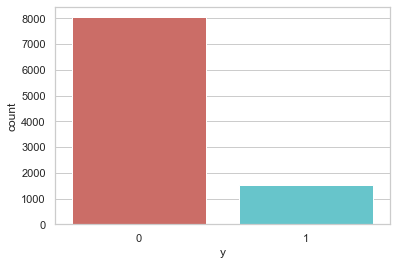

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [8]:
count_default = len(data[data['y']==1])
count_no_default = len(data[data['y']==0])
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default is:", pct_of_default*100)
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no-default is:", pct_of_no_default*100)

 percentage of default is: 16.005429108373356
 percentage of no-default is: 83.99457089162664


In [9]:
data.groupby('y').mean()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
y,,,,,,,,,,,,
0,0.832318,0.120770,314.574123,10.941091,12.494413,713.326911,4592.632624,16122.724425,45.759608,1.433934,0.161591,0.056557
1,0.661448,0.132452,342.785114,10.885023,13.195838,697.828441,4393.541259,21066.293542,52.255075,2.330724,0.174821,0.091324


In [10]:
data.groupby('credit.policy').mean()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,y
credit.policy,,,,,,,,,,,,
0,0.138680,294.367115,10.88852,13.877901,683.978051,4058.456304,29773.15257,52.934872,3.971092,0.248394,0.091006,0.277837
1,0.118754,325.079200,10.94268,12.298684,717.356031,4682.468461,13798.40428,45.312677,0.997536,0.143191,0.055123,0.131518


In [11]:
data.groupby('purpose').mean()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,y
purpose,,,,,,,,,,,,,
all_other,0.787216,0.116771,244.937542,10.845313,11.079498,715.344058,4311.706153,12883.039897,39.712321,1.646504,0.179751,0.048048,0.166023
credit_card,0.808241,0.119738,319.500713,11.047230,14.099398,709.626783,4857.005943,23180.020602,53.600475,1.387480,0.151347,0.072108,0.115689
debt_consolidation,0.814506,0.126595,358.984390,10.912909,14.076462,703.871367,4533.037139,17146.710639,54.125504,1.461461,0.163255,0.070508,0.152388
educational,0.740525,0.119907,217.547201,10.549956,11.344927,708.282799,4008.595724,10828.897959,38.801166,1.854227,0.157434,0.043732,0.201166
home_improvement,0.813990,0.117507,337.071590,11.201979,10.197504,724.806041,5201.995562,17328.756757,34.274626,1.941176,0.136725,0.066773,0.170111
major_purchase,0.848970,0.114171,243.483913,10.844895,10.159886,722.503432,4325.969108,7281.453089,32.457895,1.562929,0.173913,0.048055,0.112128
small_business,0.799677,0.138087,433.826607,11.146216,10.793296,719.988691,4892.115778,27581.203554,40.070436,1.933764,0.155089,0.056543,0.277868


In [12]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,y
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Visualizations

Using countplot , find how many loans not fully paid per purpose

<AxesSubplot:xlabel='y', ylabel='count'>

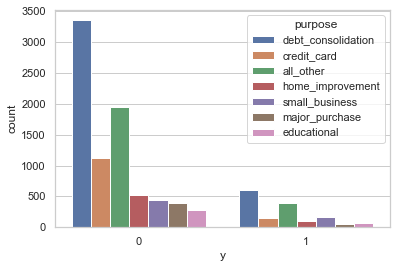

In [13]:
sns.countplot(data=data, x='y', hue='purpose')

In [14]:
data.groupby('purpose')['y'].value_counts().unstack()

y,0,1
purpose,,
all_other,1944,387
credit_card,1116,146
debt_consolidation,3354,603
educational,274,69
home_improvement,522,107
major_purchase,388,49
small_business,447,172


<AxesSubplot:xlabel='purpose'>

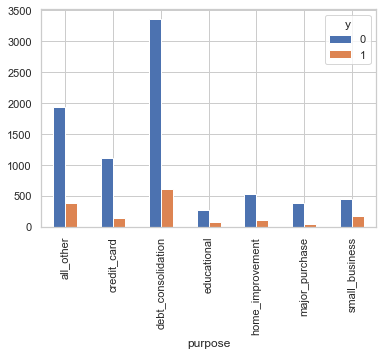

In [15]:
data.groupby('purpose')['y'].value_counts().unstack().plot.bar()

In [16]:
data.groupby('purpose')['y'].mean().sort_values(ascending=False)

purpose
small_business        0.277868
educational           0.201166
home_improvement      0.170111
all_other             0.166023
debt_consolidation    0.152388
credit_card           0.115689
major_purchase        0.112128
Name: y, dtype: float64

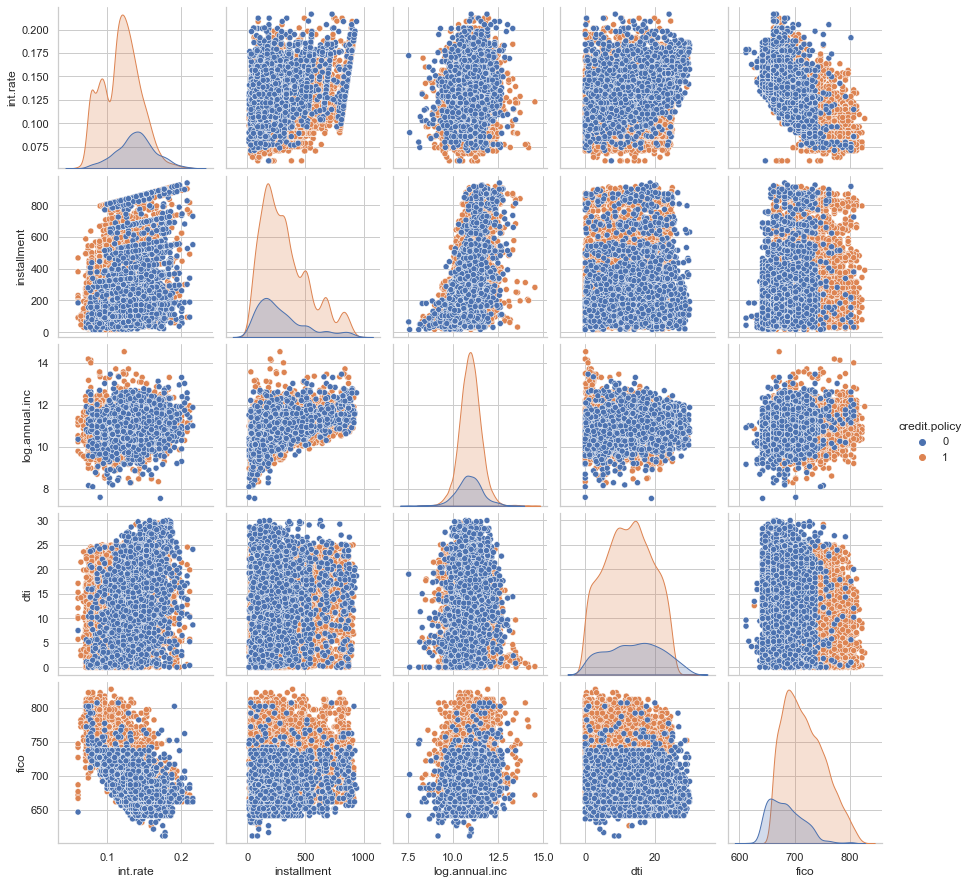

In [17]:
sns.pairplot(data.iloc[:, :7], hue='credit.policy')

# Create dummy variables

In [18]:
cat_vars=['purpose']

for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['purpose']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [19]:
data_final=data[to_keep]
data_final.columns.values

array(['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'y',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'], dtype=object)

# Over-sampling using SMOTE

In [20]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("\033[1m Length of oversampled data is:",len(os_data_X))
print("\033[1m Number of default in oversampled data is:",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Number of no-default in oversampled data is:",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Proportion of default data in oversampled data is:",len(os_data_y[os_data_y['y']==1])/len(os_data_X))
print("\033[1m Proportion of no-default data in oversampled data is:",len(os_data_y[os_data_y['y']==0])/len(os_data_X))

 Length of oversampled data is: 10790
 Number of default in oversampled data is: 5395
 Number of no-default in oversampled data is: 5395
 Proportion of default data in oversampled data is: 0.5
 Proportion of no-default data in oversampled data is: 0.5


# Recursive Feature Elimination

In [21]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

rfe = RFE(model, 13)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=13 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True  True  True  True  True  True  True  True  True False False False
  True  True  True False False  True False]
[1 1 1 1 1 1 1 1 1 5 6 7 1 1 1 3 4 1 2]


In [22]:
X = os_data_X
y = os_data_y

data_X2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfe.ranking_},)
data_X2.sort_values(by=['Importance'])

,Feature,Importance
0,credit.policy,1
1,int.rate,1
2,installment,1
3,log.annual.inc,1
4,dti,1
5,fico,1
6,days.with.cr.line,1
7,revol.bal,1
8,revol.util,1
17,purpose_major_purchase,1


In [23]:
cols=[]
for i in range (0, len(data_X2["Importance"])):
    if data_X2["Importance"][i] == 1:
        cols.append(data_X2["Feature"][i])
print(cols)
print(len(cols))

['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'purpose_all_other', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_major_purchase']
13


In [24]:
X = X[cols]
y = y['y']

# Decision Tree Classifier Model Fitting

In [25]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("\033[1m Accuracy of Decision Tree Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of Decision Tree Classifier on test set: 76.10%


In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1339  454]
 [ 397 1371]]


In [28]:
print("\033[1mThe result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions.")
print("\033[1mThe result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions.")
print("\033[1mWe have a total predictions of: ",(confusion_matrix.sum()))

The result is telling us that we have:  2710 correct predictions.
The result is telling us that we have:  851 incorrect predictions.
We have a total predictions of:  3561


# Compute precision, recall, F-measure and support

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1793
           1       0.75      0.78      0.76      1768

    accuracy                           0.76      3561
   macro avg       0.76      0.76      0.76      3561
weighted avg       0.76      0.76      0.76      3561



# ROC Curve

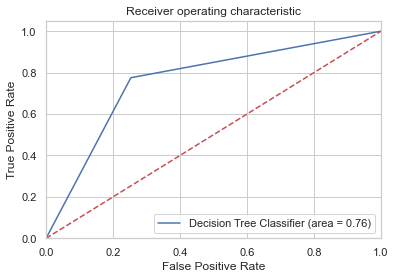

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

In [31]:
loans_features = [x for i,x in enumerate(X.columns) if i!=len(X.columns)]

print("Feature importances:\n{}".format(model.feature_importances_))

Feature importances:
[0.11853427 0.12039313 0.0848274  0.06956046 0.07983715 0.05758952
 0.09813201 0.09314659 0.08105178 0.0547846  0.06860659 0.04084138
 0.03269512]


In [32]:
feature_labels = np.array(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_major_purchase'])

importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

int.rate-12.04%
credit.policy-11.85%
days.with.cr.line-9.81%
revol.bal-9.31%
installment-8.48%
revol.util-8.11%
dti-7.98%
log.annual.inc-6.96%
purpose_credit_card-6.86%
fico-5.76%
purpose_all_other-5.48%
purpose_debt_consolidation-4.08%
purpose_major_purchase-3.27%


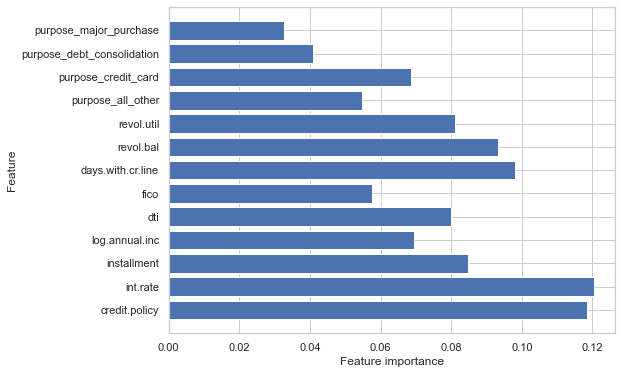

In [33]:
def plot_feature_importances_loans(model):
    plt.figure(figsize=(8,6))
    n_features = len(X.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), loans_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_loans(model)
plt.savefig('feature_importance')